In [118]:
import pandas as pd
import matplotlib.pyplot as plt

In [119]:
train = pd.read_csv('train.csv')
questions = pd.read_csv('questions.csv')
lectures = pd.read_csv('lectures.csv')

In [120]:
train['user_id'] = train['user_id'].astype('int32')
train['content_id'] = train['content_id'].astype('int16')
train['content_type_id'] = train['content_type_id'].astype('int8')
train['task_container_id'] = train['task_container_id'].astype('int16')
train['user_answer'] = train['user_answer'].astype('int8')
train['answered_correctly'] = train['answered_correctly'].astype('int8')
train['prior_question_elapsed_time'] = train['prior_question_elapsed_time'].astype('float32')
train['prior_question_had_explanation'] = train['prior_question_had_explanation'].astype('boolean')

In [121]:
print(f'В этом наборе данных {train.shape[0]} строк и {train.shape[1]} столбцов')

В этом наборе данных 101230332 строк и 10 столбцов


Заметим что row_id возможно дублирует index

In [122]:
print(f"Минимально значение row_id {train['row_id'].min()}, максимальное {train['row_id'].max()}, каждое значение встречается не более {train['row_id'].value_counts().max()} раза")

Минимально значение row_id 0, максимальное 101230331, каждое значение встречается не более 1 раза


Минимальное и максимальное значение совпадает с index, все значения уникальны. row_id можно удалить

In [123]:
train = train.drop(columns=['row_id'])
train

,timestamp,user_id,content_id,content_type_id,task_container_id,user_answer,answered_correctly,prior_question_elapsed_time,prior_question_had_explanation
0,0,115,5692,0,1,3,1,NaN,<NA>
1,56943,115,5716,0,2,2,1,37000.0,False
2,118363,115,128,0,0,0,1,55000.0,False
3,131167,115,7860,0,3,0,1,19000.0,False
4,137965,115,7922,0,4,1,1,11000.0,False
...,...,...,...,...,...,...,...,...,...
101230327,428564420,2147482888,3586,0,22,0,1,18000.0,True
101230328,428585000,2147482888,6341,0,23,3,1,14000.0,True
101230329,428613475,2147482888,4212,0,24,3,1,14000.0,True
101230330,428649406,2147482888,6343,0,25,1,0,22000.0,True


In [124]:
print(f'timestamp лежит в границах от {train["timestamp"].min()} до {train["timestamp"].max()}')

timestamp лежит в границах от 0 до 87425772049


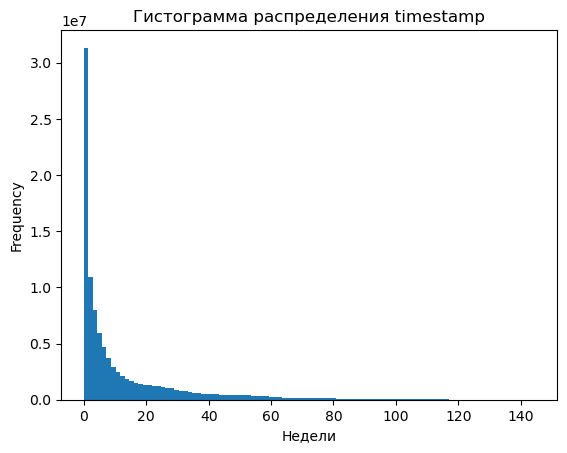

In [125]:
# 604800000 - количество мс в неделе
ts = train['timestamp']/(604800000)
fig = plt.figure()
# Разобьем данные на 100 столбцов
ts.plot.hist(bins=100)
plt.title("Гистограмма распределения timestamp")
plt.xlabel("Недели")
plt.show()

In [126]:
train.groupby(['user_id'])['timestamp'].max()


user_id
115             668090043
124                571323
2746               835457
5382           2101551456
8623            862338736
                 ...     
2147470770     2832089444
2147470777    13332685203
2147481750       55954768
2147482216     1470594073
2147482888      428692118
Name: timestamp, Length: 393656, dtype: int64

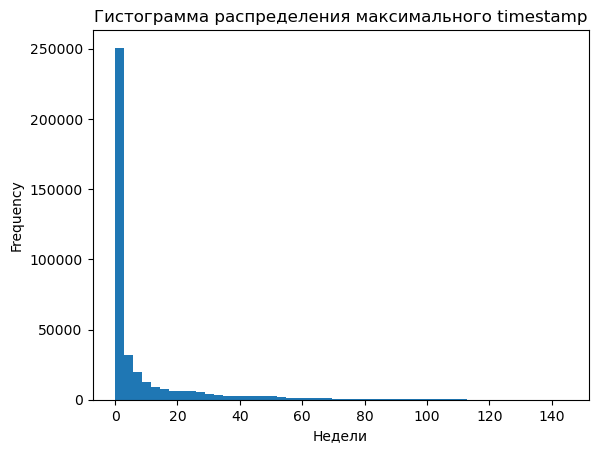

In [127]:
train_by_user = train.groupby(['user_id'])
m_ts_by_user_df = train_by_user['timestamp'].max()
# 604800000 - количество мс в неделе
m_ts_by_user = m_ts_by_user_df/(604800000)
fig2 = plt.figure()
# Разобьем данные на 30 столбцов
m_ts_by_user.plot.hist(bins=50)
plt.title("Гистограмма распределения максимального timestamp")
plt.xlabel("Недели")
plt.show()

In [128]:
print(f"Количество уникальных user_id: {train['user_id'].nunique()}")
print(f"В среднем записей на user_id: {train.shape[0] // train['user_id'].nunique()}")


Количество уникальных user_id: 393656
В среднем записей на user_id: 257


In [129]:
questons_p = train['content_type_id'].value_counts(normalize=True)[0]
print(f'content_type_id принимает значение 0 или 1. 0 с вероятностью {questons_p:2.0%}')

content_type_id принимает значение 0 или 1. 0 с вероятностью 98%


In [130]:
train['user_answer'].value_counts()

 0    28186489
 1    26990007
 3    26084784
 2    18010020
-1     1959032
Name: user_answer, dtype: int64

In [131]:
user_answers = train[train['user_answer'] != -1]['user_answer'].value_counts(normalize=True)
max_user_answer = train['user_answer'].max()
for answer in range(max_user_answer + 1):
    print(f"Ответ {answer}: {user_answers[answer]:2.2%}")

Ответ 0: 28.39%
Ответ 1: 27.19%
Ответ 2: 18.14%
Ответ 3: 26.28%


In [132]:
train['answered_correctly'].value_counts()

 1    65244627
 0    34026673
-1     1959032
Name: answered_correctly, dtype: int64

In [133]:
user_correct_answers = train[train['answered_correctly'] != -1]['answered_correctly'].value_counts(normalize=True)
print(f"Верных: {user_correct_answers[1]:2.2%}")
print(f"Ошибочных : {user_correct_answers[0]:2.2%}")

Верных: 65.72%
Ошибочных : 34.28%


Распределение процента правильных ответов по пользователям

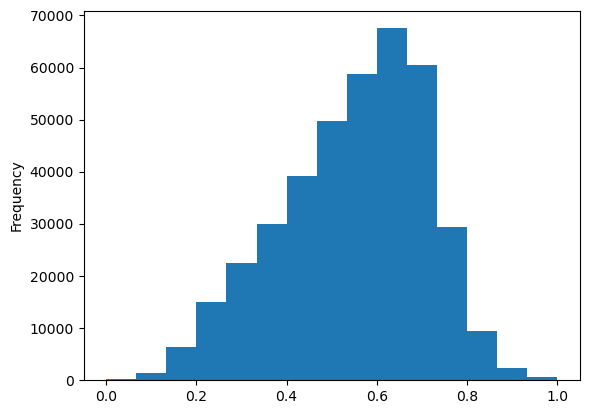

In [134]:
correct_per_user  = train[train['answered_correctly'] != -1].groupby('user_id')['answered_correctly'].mean()
correct_per_user.plot.hist(bins=15)
plt.show()

In [135]:
content_id_count = train['content_id'].nunique()
content_id_min = train['content_id'].min()
content_id_max = train['content_id'].max()

print(f"Количество уникальных content_id: {content_id_count}")
print(f"Диапазон от {content_id_min} до {content_id_max}")

Количество уникальных content_id: 13782
Диапазон от 0 до 32736


In [136]:
print(f"Срденестатистический content_id встрчается {train['content_id'].value_counts().median():.0f} раз")

Срденестатистический content_id встрчается 4728 раз


Добавим в train информацию о part из questions по каждому content_id

In [137]:
train = train.merge(questions[['question_id','part']], left_on='content_id', right_on='question_id').drop(columns=['question_id'])

Создадим отдельный датафрейм исключив лекции

In [138]:
train_questions = train[train['answered_correctly'] != -1]

In [139]:
totla_p = train_questions['answered_correctly'].mean()
print(f"Общий процент правильных ответов: {totla_p:2.2%}")

Общий процент правильных ответов: 65.72%


Найдем процент правильных ответов по каждому part

In [140]:
display(train_questions.groupby('part')['answered_correctly'].mean().sort_values(ascending=False).apply(lambda x: f'{x:2.2%}'))

part
1    74.50%
2    70.87%
3    70.15%
6    66.94%
7    65.96%
4    63.10%
5    61.01%
Name: answered_correctly, dtype: object

In [141]:
train_elapsed_time = train[train['prior_question_elapsed_time'].notna()]
elapsed_time_max = train_elapsed_time['prior_question_elapsed_time'].max()
elapsed_time_min = train_elapsed_time[train_elapsed_time['prior_question_elapsed_time'] > 0]['prior_question_elapsed_time'].min()
elapsed_time_med = train_elapsed_time['prior_question_elapsed_time'].median()
print(f'Максимальный prior_question_elapsed_time: {elapsed_time_max:.0f} мс')
print(f'Минимальный (больше 0) prior_question_elapsed_time: {elapsed_time_min:.0f} мс')
print(f'Медианный prior_question_elapsed_time: {elapsed_time_med:.0f} мс')

Максимальный prior_question_elapsed_time: 300000 мс
Минимальный (больше 0) prior_question_elapsed_time: 200 мс
Медианный prior_question_elapsed_time: 21000 мс


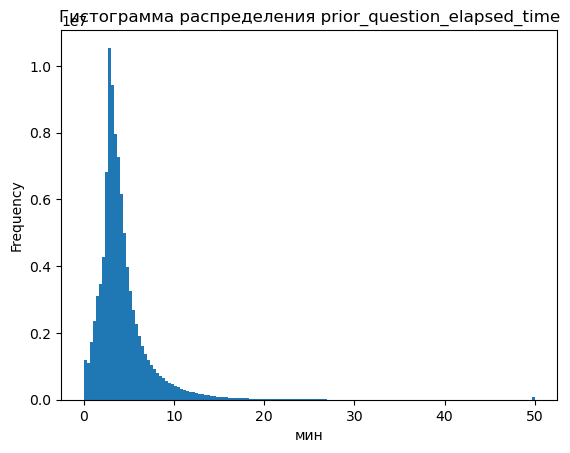

In [142]:
# 6000 - количество мс в минуте
et = train_elapsed_time['prior_question_elapsed_time']/(6000)
fig = plt.figure()
# Разобьем данные на 150 столбцов
et.plot.hist(bins=150)
plt.title("Гистограмма распределения prior_question_elapsed_time")
plt.xlabel("мин")
plt.show()

In [143]:
had_exploration_p = train['prior_question_had_explanation'].mean()
print(f"Было объяснено {had_exploration_p:2.2%} вопросов")

Было объяснено 90.00% вопросов


In [144]:
lectures

,lecture_id,tag,part,type_of
0,89,159,5,concept
1,100,70,1,concept
2,185,45,6,concept
3,192,79,5,solving question
4,317,156,5,solving question
...,...,...,...,...
413,32535,8,5,solving question
414,32570,113,3,solving question
415,32604,24,6,concept
416,32625,142,2,concept


In [145]:
lectures["type_of"].value_counts()

concept             222
solving question    186
intention             7
starter               3
Name: type_of, dtype: int64

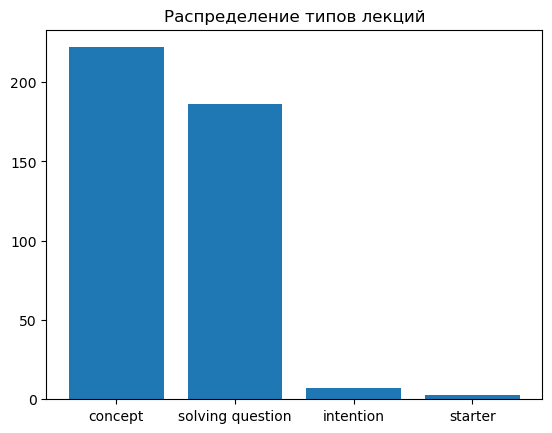

In [146]:
lect_type_of = lectures["type_of"].value_counts()
fig = plt.figure()
plt.bar(lect_type_of.index, lect_type_of.values)
plt.title("Распределение типов лекций")
plt.show()

In [147]:
print(f"Количество уникальных тегов в лекциях: {lectures['tag'].nunique()}")

Количество уникальных тегов в лекциях: 151


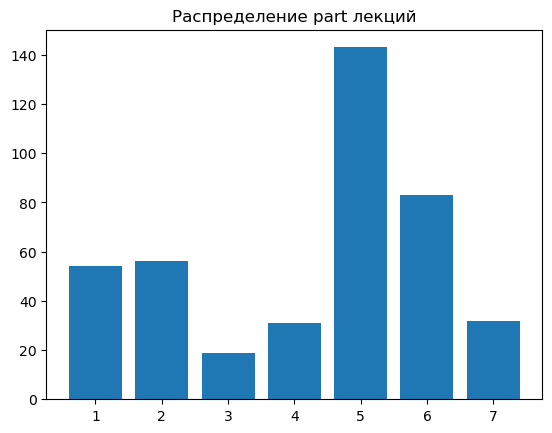

In [148]:
lect_part = lectures["part"].value_counts()
fig = plt.figure()
plt.bar(lect_part.index, lect_part.values)
plt.title("Распределение part лекций")
plt.show()